**LINN CAO NGUYEN PHUONG**

Fall 2021

CS 251: Data Analysis and Visualization

# Lab 5: K-Means

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.vq import kmeans2

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 10})
plt.rcParams.update({'figure.figsize': [12,5]})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

 

## Task 1:  Import and explore the data

We are going to be using K-Means to explore the flea beetle dataset which contains measurements of three different types of beetles.

**Dataset Variables**      
**species:** Ch. concinna, Ch. heptapotamica, and Ch. heikertingeri     
**tars1:** width of the first joint of the first tarsus in microns    
**tars2:** width of the second joint of the first tarsus in microns    
**head:** the maximal width of the head between the external edges of the eyes in 0.01 mm    
**aede1:** the maximal width of the aedeagus in the fore-part in microns     
**aede2:** the front angle of the aedeagus (1 unit = 7.5 degrees)    
**aede3:** the aedeagus width from the side in microns    
 
1. Import dataset using pandas [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) to create a Dataframe from `data/flea.csv`.
2. Using the [Dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html) documentation, Check the data
    1. Print the shape of the data
    2. Print first 5 rows of the data using head.
3. Use [Dataframe.replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) to replace the values in the species column with integers values and assign the result to a new dataframe.
    1. Use the dictionary: `species_dict = {'Concinna ': 0, 'Heptapot. ': 1, 'Heikert. ':2}`
    2. Use the inplace parameter to replace the values in the dataframe.
    4. Print the first 5 items of the updated dataframe to make sure that the replace worked correctly
2. Graph a scatterplot of the `tars1` and `aede3` columns using plt.scatter
    1. Scatter Parameters
        1. Graph `tars1` on the x axis and `aede3` on the y axis
        3. Use the `species` column of your data for the color with a black edgecolor
        4. Use an perceptually uniform sequential [colormap](https://matplotlib.org/tutorials/colors/colormaps.html). 
    3. Have a title, and axis labels.

(74, 8)
   id  tars1  tars2  head  aede1  aede2  aede3    species
0   1    191    131    53    150     15    104  Concinna 
1   2    185    134    50    147     13    105  Concinna 
2   3    200    137    52    144     14    102  Concinna 
3   4    173    127    50    144     16     97  Concinna 
4   5    171    118    49    153     13    106  Concinna 
   id  tars1  tars2  head  aede1  aede2  aede3  species
0   1    191    131    53    150     15    104        0
1   2    185    134    50    147     13    105        0
2   3    200    137    52    144     14    102        0
3   4    173    127    50    144     16     97        0
4   5    171    118    49    153     13    106        0


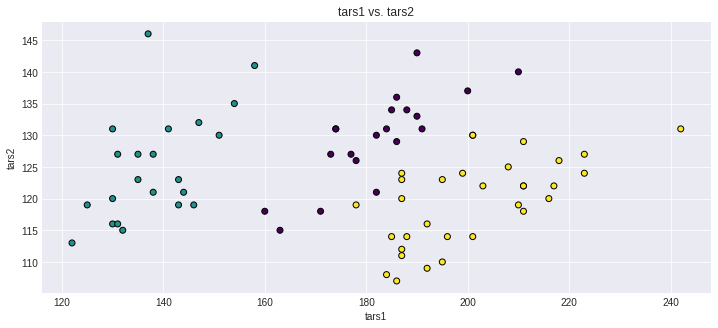

In [2]:
flea_data = pd.read_csv('data/flea.csv')

print(flea_data.shape)
print(flea_data.head(5))

species_dict = {'Concinna ': 0, 'Heptapot. ': 1, 'Heikert. ':2}
flea_data = flea_data.replace(to_replace=species_dict)
print(flea_data.head(5))

tars1 = flea_data['tars1']
tars2 = flea_data['tars2']
species = flea_data['species']
plt.scatter(tars1, tars2, c = species, cmap = 'viridis', edgecolors='black')
plt.xlabel('tars1')
plt.ylabel('tars2')
plt.title('tars1 vs. tars2')

plt.show()

## Task 2: K-Means

### Part 1

1. Use the [SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.vq.kmeans2.html) documentation to find out how to calculate K-Means on for the columns `tars1` and `aede3` using  kmeans2 
    1. Use 3 clusters and set the method of initialization to random. 
    1. Make sure to convert the data to floats, with `.astype('float')` before running the analysis.
2. Calculate how well a data series is fitted to the clusters and print the result
    1. For each datapoint calculate the euclidean distance between that datapoint and its cluster
    2. Sum the euclidean distances
3. Graph the results of the clustering next in a plot next to the actual data. (2 subplots)
    1. Graph 'tars1' on the x axis and 'aede3' on the y axis
    3. Have a title for each subplot, and axis labels.
    1. Graph the original data following the instructions from Part 1 in the first subplot. 
        1. Use the `species` column of your data for the color with a black edgecolor
    1. Graph the results of K-means in the second subplot. [See example](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.vq.kmeans2.html)
        1. Graph the data colored by the clusters with the centroids labeled.  

15011.696273291927


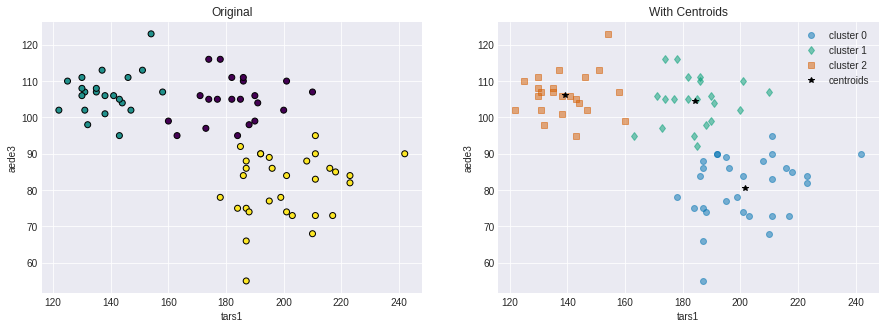

In [3]:
aede3 = flea_data['aede3']

flea_data = flea_data.astype('float')
data = flea_data[['tars1', 'aede3']].values

centroid, label = kmeans2(data, 3, minit = 'random')
cent = centroid[label]
dist = np.sum((data - cent)**2)
print(dist)

plt.figure(figsize = (15,5))
fig1 = plt.subplot(121)
plt.scatter(tars1, aede3, c = species, cmap = 'viridis', edgecolors='black')
plt.xlabel('tars1')
plt.ylabel('aede3')
plt.title('Original')
fig2 = plt.subplot(122)
w0 = data[label == 0]
w1 = data[label == 1]
w2 = data[label == 2]
plt.plot(w0[:, 0], w0[:, 1], 'o', alpha=0.5, label='cluster 0')
plt.plot(w1[:, 0], w1[:, 1], 'd', alpha=0.5, label='cluster 1')
plt.plot(w2[:, 0], w2[:, 1], 's', alpha=0.5, label='cluster 2')
plt.plot(centroid[:, 0], centroid[:, 1], 'k*', label='centroids')
plt.legend(shadow=True)
plt.xlabel('tars1')
plt.ylabel('aede3')
plt.title('With Centroids')
plt.show()

## Task 3: Analysis

1. Write code that calculates the kmeans2 50 times
2. Save the centroids, labels and how well a data series is fitted to the clusters for each test.  

In [27]:
labels, centroids, distances = [], [], []

for i in range(50):
    centroid, label = kmeans2(data, 3, minit = 'random')
    cent = centroid[label]
    dist = np.sum((data - cent)**2)
    labels.append(label)
    centroids.append(cent)
    distances.append(dist)

print(len(labels))
print(len(centroids))
print(len(distances))

50
50
50


3. Graph a plot with 3 subplots
    1. The first plot should graph Graph 'tars1' on the x axis and 'aede3' on the y axis with the original labels
    2. Using your above analysis the second plot should graph the results with the best kmeans fit using the saved labels and centroids from the above analysis.
    2. Using your above analysis the third plot should graph the results with the worst kmeans fit using the saved labels and centroids from the above analysis.
    4. For formatting, follow the instructions in Task 2.

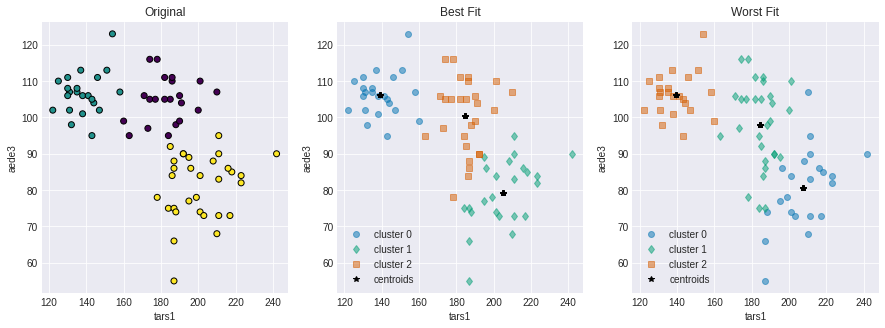

In [29]:
plt.figure(figsize = (15,5))

fig1 = plt.subplot(131)
plt.scatter(tars1, aede3, c = species, cmap = 'viridis', edgecolors='black')
plt.xlabel('tars1')
plt.ylabel('aede3')
plt.title('Original')

dist_best = min(distances)
dist_best_ind = distances.index(dist_best)
centroid_best = centroids[dist_best_ind]
label_best = labels[dist_best_ind]

fig2 = plt.subplot(132)
w0_best = data[label_best == 0]
w1_best = data[label_best == 1]
w2_best = data[label_best == 2]
plt.plot(w0_best[:, 0], w0_best[:, 1], 'o', alpha=0.5, label='cluster 0')
plt.plot(w1_best[:, 0], w1_best[:, 1], 'd', alpha=0.5, label='cluster 1')
plt.plot(w2_best[:, 0], w2_best[:, 1], 's', alpha=0.5, label='cluster 2')
plt.plot(centroid_best[:, 0], centroid_best[:, 1], 'k*', label='centroids')
plt.legend(shadow=True)
plt.xlabel('tars1')
plt.ylabel('aede3')
plt.title('Best Fit')

dist_worst = max(distances)
dist_worst_ind = distances.index(dist_worst)
centroid_worst = centroids[dist_worst_ind]
label_worst = labels[dist_worst_ind]

fig = plt.subplot(133)
w0_worst = data[label_worst == 0]
w1_worst = data[label_worst == 1]
w2_worst = data[label_worst == 2]
plt.plot(w0_worst[:, 0], w0_worst[:, 1], 'o', alpha=0.5, label='cluster 0')
plt.plot(w1_worst[:, 0], w1_worst[:, 1], 'd', alpha=0.5, label='cluster 1')
plt.plot(w2_worst[:, 0], w2_worst[:, 1], 's', alpha=0.5, label='cluster 2')
plt.plot(centroid_worst[:, 0], centroid_worst[:, 1], 'k*', label='centroids')
plt.legend(shadow=True, loc='lower left')
plt.xlabel('tars1')
plt.ylabel('aede3')
plt.title('Worst Fit')

plt.show()

#### Question 1: Why does kmeans produce different solutions?

#### Answer 1:

Because we're using random initialization, which gives different solutions by trying different random seeds.